In [1]:

import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
import warnings

warnings. filterwarnings('ignore')
%matplotlib inline


In [2]:
df = pd.read_csv('spam.csv')

# Data Analysis

In [3]:
df.head()


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5572, 2)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
print(df.Category.unique())
print(df.Message.unique())





['ham' 'spam']
['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
 'Ok lar... Joking wif u oni...'
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
 ... 'Pity, * was in mood for that. So...any other suggestions?'
 "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free"
 'Rofl. Its true to its name']


In [7]:
df.groupby( 'Category').describe()


Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [8]:
df.dtypes

Category    object
Message     object
dtype: object

In [9]:
df.isnull().any()

Category    False
Message     False
dtype: bool

# Data Cleaning And Preprocession

In [10]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder

def handleOrdinalEncoding(col, custom_categories):
    label_encoder = LabelEncoder()
    label_encoder.fit(custom_categories)
    encoded_data =label_encoder.fit_transform(df[col] )
    return encoded_data
    

In [12]:

df['Category'] = handleOrdinalEncoding('Category' , [ 'ham' , 'spam' ])

df = df.rename(columns={'Category':'is_spam'})

features = df.Message
target = df.is_spam


In [13]:
features , target

(0       Go until jurong point, crazy.. Available only ...
 1                           Ok lar... Joking wif u oni...
 2       Free entry in 2 a wkly comp to win FA Cup fina...
 3       U dun say so early hor... U c already then say...
 4       Nah I don't think he goes to usf, he lives aro...
                               ...                        
 5567    This is the 2nd time we have tried 2 contact u...
 5568                 Will ü b going to esplanade fr home?
 5569    Pity, * was in mood for that. So...any other s...
 5570    The guy did some bitching but I acted like i'd...
 5571                           Rofl. Its true to its name
 Name: Message, Length: 5572, dtype: object,
 0       0
 1       0
 2       1
 3       0
 4       0
        ..
 5567    1
 5568    0
 5569    0
 5570    0
 5571    0
 Name: is_spam, Length: 5572, dtype: int64)

In [ ]:
# from sklearn.feature_extraction.text import  CountVectorizer

# def count_vectorizing(data):
#     # vectorizer = CountVectorizer(analyzer='word', ngram_range=(2, 2))
#     # x = vectorizer.fit_transform(['this is first doc' , 'second doc of me' , 'hey there is last chance to apply' , 'i will call later'])
#     vectorizer = CountVectorizer()


#     features_count = vectorizer.fit_transform(data)

#     new_features_col = vectorizer.get_feature_names_out()
#     # print(new_features_col)
#     # print(len(vectorizer.get_feature_names_out()))
#     # print(features_count.toarray()[:3])
#     # print(features_count.shape)

#     vector_count_df = pd.DataFrame(features_count.toarray() , columns=new_features_col )
#     print(vector_count_df.shape)

#     return pd.concat([df , vector_count_df] , axis='columns')

# df = count_vectorizing(df['Message'])

# Split data into training and testing sets

In [14]:
from sklearn.model_selection import  train_test_split


In [15]:

x_train , x_test , y_train , y_test = train_test_split(features , target , test_size=0.3, random_state=42)

In [16]:
x_train.shape

(3900,)

In [17]:
x_train

708     Quite late lar... Ard 12 anyway i wun b drivin...
4338                        on a Tuesday night r u 4 real
5029    Go chase after her and run her over while she'...
4921     G says you never answer your texts, confirm/deny
2592         Still work going on:)it is very small house.
                              ...                        
3772    Hi, wlcome back, did wonder if you got eaten b...
5191                               Sorry, I'll call later
5226        Prabha..i'm soryda..realy..frm heart i'm sory
5390                           Nt joking seriously i told
860               Did he just say somebody is named tampa
Name: Message, Length: 3900, dtype: object

In [18]:
x_train.values

array(['Quite late lar... Ard 12 anyway i wun b drivin...',
       'on a Tuesday night r u 4 real',
       "Go chase after her and run her over while she's crossing the street",
       ..., "Prabha..i'm soryda..realy..frm heart i'm sory",
       'Nt joking seriously i told',
       'Did he just say somebody is named tampa'], dtype=object)

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
vectorize = CountVectorizer()
vectorize = vectorize.fit(x_train.values)

x_train_count = vectorize.transform(x_train.values)
print(x_train_count.toarray()[:2])
print(x_train_count.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(3900, 7262)


In [20]:
x_test_count = vectorize.transform(x_test.values)
print(x_test_count.toarray()[:2])
print(x_test_count.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(1672, 7262)


# Classification with Naive Bayes Classifier

types of Naïve Bayes Model:
There are three types of Naive Bayes Model, which are given below:

Gaussian: The Gaussian model assumes that features follow a normal distribution. This means if predictors take continuous values instead of discrete, then the model assumes that these values are sampled from the Gaussian distribution.

Multinomial: The Multinomial Naïve Bayes classifier is used when the data is multinomial distributed. It is primarily used for document classification problems, it means a particular document belongs to which category such as Sports, Politics, education, etc.
The classifier uses the frequency of words for the predictors.

Bernoulli: The Bernoulli classifier works similar to the Multinomial classifier, but the predictor variables are the independent Booleans variables. Such as if a particular word is present or not in a document. This model is also famous for document classification tasks.

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
model = MultinomialNB()
model.fit(x_train_count , y_train)

MultinomialNB()

In [ ]:
x_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
print('model score ' , model.score(x_test_count , y_test))

model score  0.9904306220095693


Confusion Matrix:
[[1444    4]
 [  12  212]]
F1 Score: 0.9903568086256211
Precision Score: 0.9903814509077666
Recall Score: 0.9904306220095693


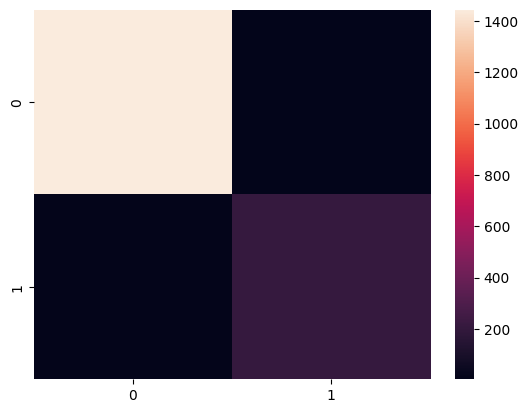

In [ ]:
y_pred = model.predict(x_test_count)
model_evaluation(y_pred , y_test)

# Evaluate the Model

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

In [ ]:
def model_evaluation(pred , actual):
    cm = confusion_matrix(actual , pred)
    print("Confusion Matrix:")
    print(cm)
    sns.heatmap(cm)

    # Calculate the F1 score
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("F1 Score:", f1)

    # Calculate the precision score
    precision = precision_score(y_test, y_pred, average='weighted')
    print("Precision Score:", precision)

    # Calculate the recall score
    recall = recall_score(y_test, y_pred, average='weighted')
    print("Recall Score:", recall)


In [ ]:
from sklearn.model_selection import cross_val_score
sum(cross_val_score(MultinomialNB(),x_train_count, y_train, cv=5))/5

0.9787179487179486

# Testing Data

In [ ]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!',
    'i am alone in night | get offer at night' ,
    'you will became billionaire by signing this | so get this offer fast'
]

words_count = vectorize.transform(emails)
print(words_count.toarray()[:2])

# emails_count = count_vectorizing(email)
# model.predict(emails_count)
print(model.predict(words_count))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[0 1 0 0]


# Pipelining The Model

In [ ]:
from sklearn.pipeline import  Pipeline

In [ ]:
clf = Pipeline([
   ( 'vectorize', CountVectorizer() ), 
   ( 'model' , MultinomialNB())
])
clf

Pipeline(steps=[('vectorize', CountVectorizer()), ('model', MultinomialNB())])

In [ ]:
clf.fit(x_train , y_train)

Pipeline(steps=[('vectorize', CountVectorizer()), ('model', MultinomialNB())])

In [ ]:
clf.score(x_test,y_test)

0.9904306220095693

In [ ]:
clf.predict(emails)


array([0, 1, 0, 0])